In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time


import seaborn as sns
sns.set_style("whitegrid")

from scipy.spatial.distance import jensenshannon

import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Update data from nomis

In [2]:
df = pd.read_csv('../../data/testing/nomis/hh_size.csv', index_col=0)

In [3]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [4]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [5]:
idx = ['Total', '1', '2', '3', '4', '5', '6', '7', '8+']

In [6]:
df = pd.DataFrame(dct, index=idx)

In [7]:
df.to_csv('../../data/testing_del/nomis/hh_size.csv')

# Compute values for synthetic data

In [8]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', '1', '2', '3', '4', '5', '6', '7', '8+']

In [9]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_del/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(1, 8):
        vals.append(np.sum(1/df[df['hh_people'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_people'] >= 8]['hh_people']))

    dct[b] = vals

In [10]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/ciDATGAN/hh_size.csv')

In [11]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_del/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(1, 8):
        vals.append(np.sum(1/df[df['hh_people'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_people'] >= 8]['hh_people']))

    dct[b] = vals

In [12]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/DATGAN/hh_size.csv')

In [13]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample_del/{}.csv'.format(b))

    vals = []
    vals.append(np.sum(1/df['hh_people']))
    for i in range(1, 8):
        vals.append(np.sum(1/df[df['hh_people'] == i]['hh_people']))
    vals.append(np.sum(1/df[df['hh_people'] >= 8]['hh_people']))

    dct[b] = vals

In [14]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/oversample/hh_size.csv')

# Compare

In [20]:
orig = pd.read_csv('../../data/testing_del/nomis/hh_size.csv', index_col=0)

In [21]:
files = [
    '../../data/testing_del/DATGAN/hh_size.csv',
    '../../data/testing_del/ciDATGAN/hh_size.csv',
    '../../data/testing_del/oversample/hh_size.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [22]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [23]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 1.25e-01 \pm 3.64e-02
ciDATGAN: 5.22e-02 \pm 3.24e-02
Oversample LTDS: 1.73e-01 \pm 5.89e-02


<AxesSubplot:>

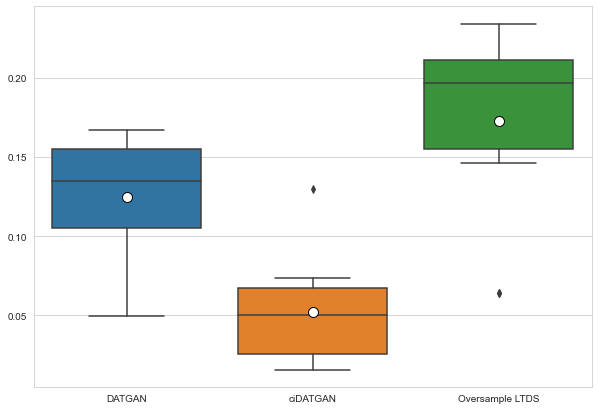

In [24]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})


In [25]:
df

,DATGAN,ciDATGAN,Oversample LTDS
0,0.135802,0.073701,0.063779
1,0.101130,0.129844,0.234200
2,0.144375,0.015762,0.145962
3,0.161981,0.070155,0.222006
4,0.117555,0.044832,0.198288
5,0.049316,0.025273,0.063887
6,0.158515,0.057823,0.211978
7,0.134002,0.023412,0.194985
8,0.079197,0.025456,0.208127
9,0.166990,0.055835,0.182683
